In [3]:
import pandas as pd 
import sklearn 


df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [69]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

### Scale Insensitive

In [72]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Scale Sensitive Models

In [79]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [95]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

In [97]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [99]:
forest.score(X_test, y_test)

0.9853658536585366

In [101]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [103]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [107]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [109]:
regressor.score(X_test_scaled, y_test)

0.8731707317073171

In [111]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [127]:
from sklearn.metrics import recall_score

y_pred = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_pred))

y_pred = nb_clf.predict(X_test)
print('Naive Bayes:', recall_score(y_test, y_pred))

y_pred = gb_clf.predict(X_test)
print('Gradient Boosting Classifier:', recall_score(y_test, y_pred))

y_pred = knn.predict(X_test_scaled)
print('KNN:', recall_score(y_test, y_pred))

y_pred = regressor.predict(X_test_scaled)
print('Logistic Regression:', recall_score(y_test, y_pred))

y_pred = svc.predict(X_test_scaled)
print('Support Vector Classifier:', recall_score(y_test, y_pred))

Forest: 0.9859154929577465
Naive Bayes: 0.9014084507042254
Gradient Boosting Classifier: 0.9859154929577465
KNN: 0.8732394366197183
Logistic Regression: 0.92018779342723
Support Vector Classifier: 0.9530516431924883


Text(0.5, 1.0, 'ROC Curve')

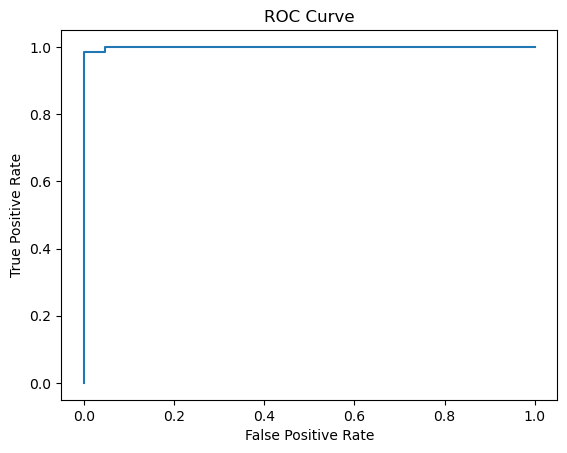

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")

In [135]:
roc_auc_score(y_test, y_probs)

0.9993565453635519

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_estimators' : [100,200,500],
        'max_depth' : [None, 10, 20, 30],
        'min_samples_split' : [2, 5, 10],
        'min_samples_leaf' : [1, 2, 4],
        'max_features' : ['sqrt', 'log2', None]
             }
forest = RandomForestClassifier(n_jobs = -1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs= -1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [167]:
best_forest = grid_search.best_estimator_

In [169]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

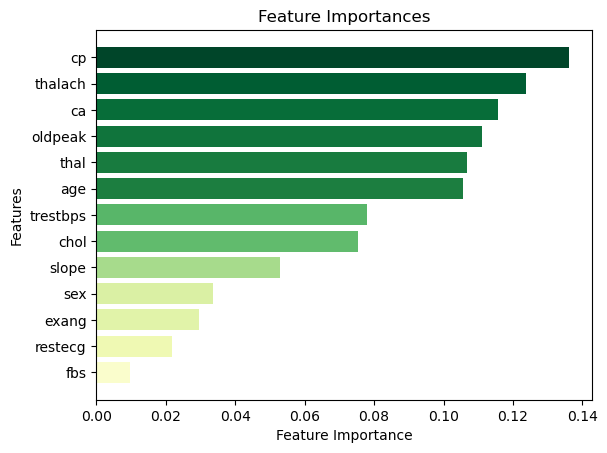

In [173]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances/max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color = colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

<Axes: >

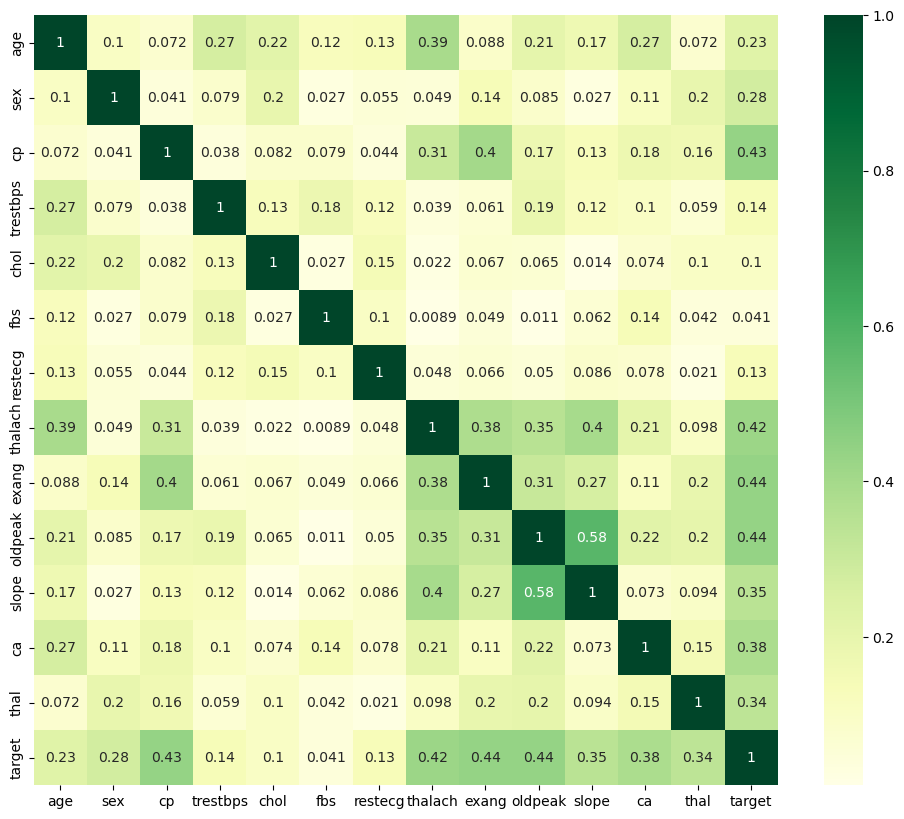

In [177]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot= True, cmap= 'YlGn')